In [1]:
# !pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Creating Class
class MyCompany:
    def __init__(self, name, symbol, sector):
        self.name = name
        self.symbol = symbol
        self.sector = sector

    def __str__(self):
        return f"{self.name} ({self.symbol}) - {self.sector}"


class StockMarket:
    def __init__(self, company, prices=None, volume=None):
        self.company = company
        self.prices = prices if prices else []
        self.volume = volume if volume else []

    def add_price(self, price):
        self.prices.append(price)

    def add_volume(self, volume):
        self.volume.append(volume)

    def get_average_price(self):
        return sum(self.prices) / len(self.prices)

    def get_average_volume(self):
        return sum(self.volume) / len(self.volume)

In [4]:
# Creating Functions
def fetch_data(symbol, period):
    try:
        data = yf.download(symbol, period=period)
        return data
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")
        return None

def stock_data_moving_average_plt(stock_data, window=20, company_name=''):
    stock_data['MA'] = stock_data['Close'].rolling(window=window).mean()
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Close'], label='Actual Price')
    plt.plot(stock_data['MA'], label=f'{window}-Day Moving Average')
    plt.title(f'Stock Prices with Moving Average - {company_name}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

In [5]:
# Fetching data for respective companies over 1yr, 6mo and 3mo periods
hp_3mo = fetch_data('HP', period='3mo')
hp_6mo = fetch_data('HP', period='6mo')
hp_1yr = fetch_data('HP', period='1y')

nvda_3mo = fetch_data('NVDA', period='3mo')
nvda_6mo = fetch_data('NVDA', period='6mo')
nvda_1yr = fetch_data('NVDA', period='1y')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


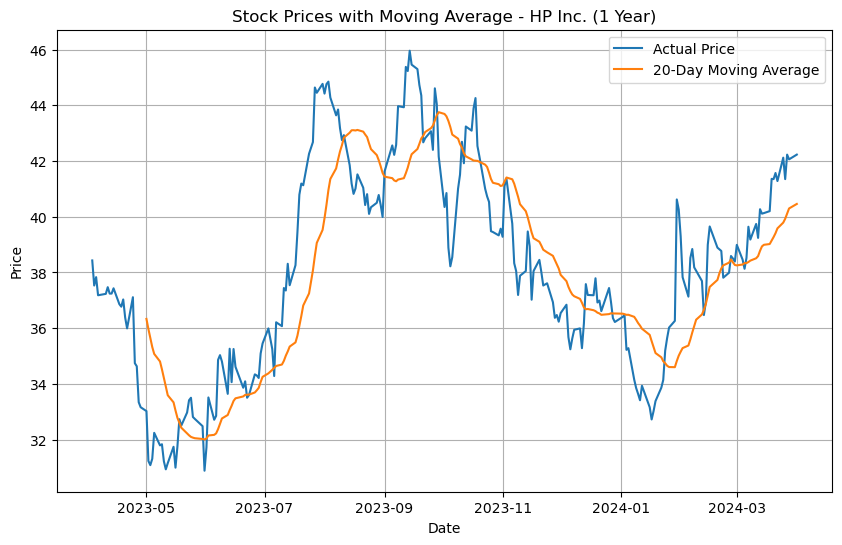

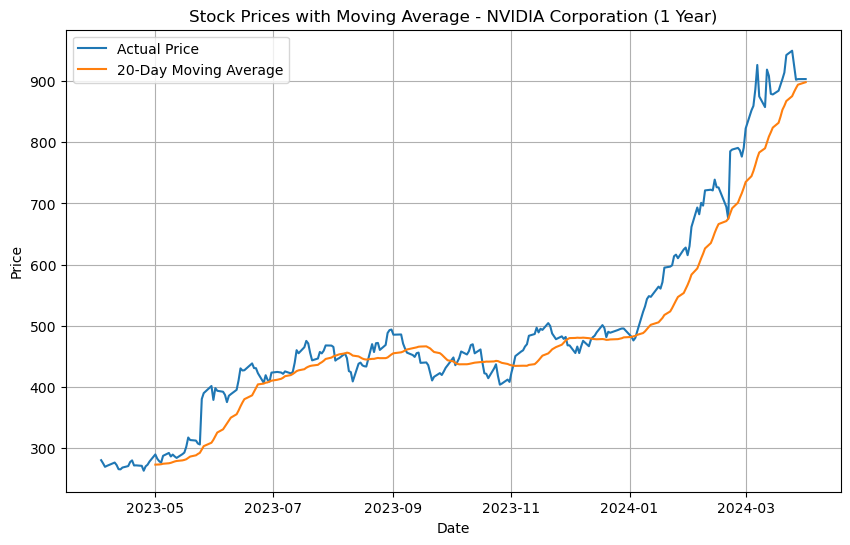

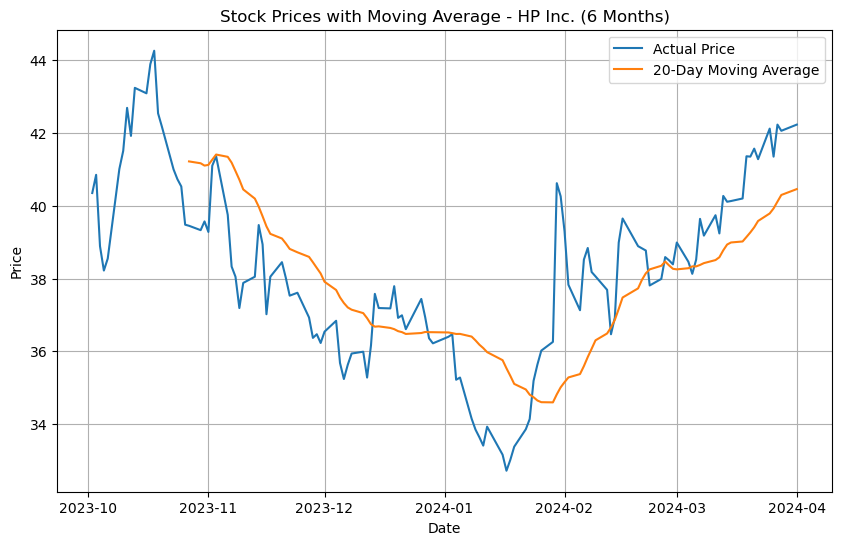

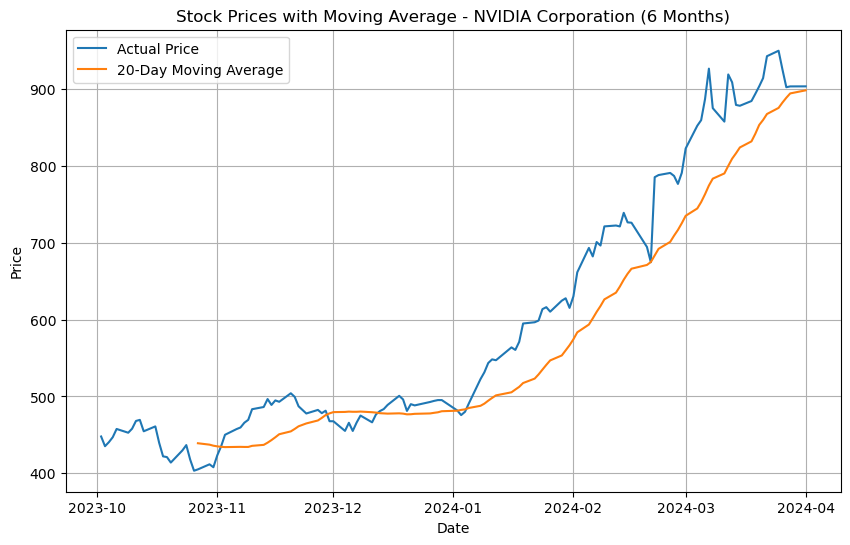

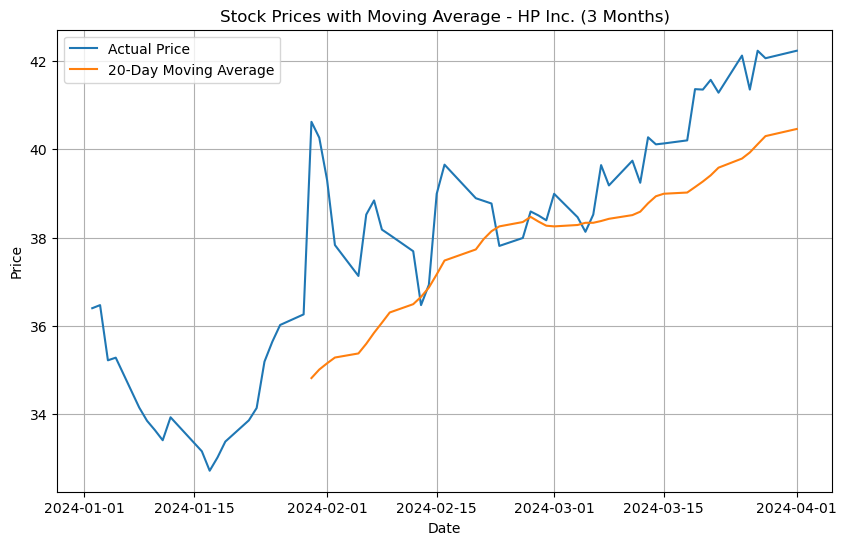

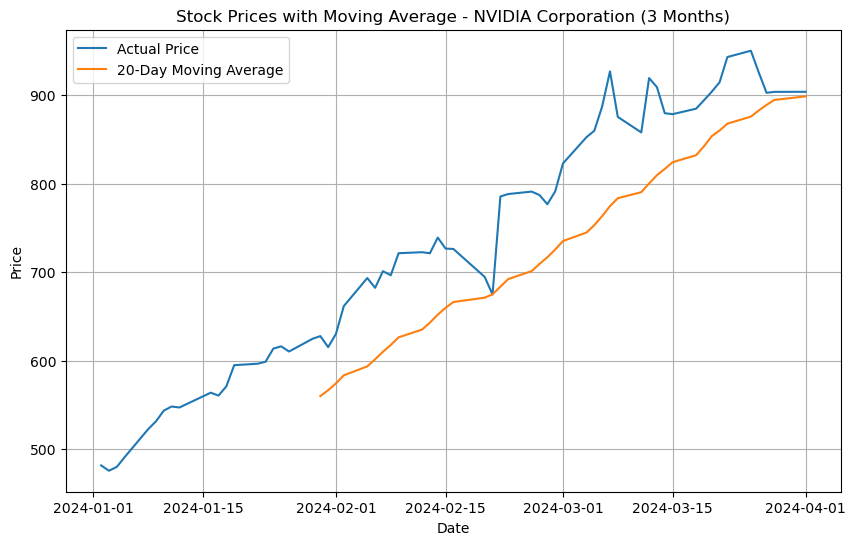

In [6]:
# Plotting stock data and moving avg
if hp_1yr is not None:
    stock_data_moving_average_plt(hp_1yr, company_name='HP Inc. (1 Year)')

if nvda_1yr is not None:
    stock_data_moving_average_plt(nvda_1yr, company_name='NVIDIA Corporation (1 Year)')

if hp_6mo is not None:
    stock_data_moving_average_plt(hp_6mo, company_name='HP Inc. (6 Months)')

if nvda_6mo is not None:
    stock_data_moving_average_plt(nvda_6mo, company_name='NVIDIA Corporation (6 Months)')

if hp_3mo is not None:
    stock_data_moving_average_plt(hp_3mo, company_name='HP Inc. (3 Months)')

if nvda_3mo is not None:
    stock_data_moving_average_plt(nvda_3mo, company_name='NVIDIA Corporation (3 Months)')
